In [73]:
#import libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MaxAbsScaler,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA 
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.tree import DecisionTreeClassifier as DT

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [74]:
df = pd.read_csv(r"C:\Users\monab\OneDrive\Documents\CSV.csv")
df.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,27-08-2014 11:29,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,27-08-2014 11:29,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,27-08-2014 11:29,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,27-08-2014 11:29,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,27-08-2014 11:30,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

2. Data Cleaning

In [76]:
df.isnull().sum()

Timestamp                       0
Age                             0
Gender                          0
Country                         0
state                         515
self_employed                  18
family_history                  0
treatment                       0
work_interfere                264
no_employees                    0
remote_work                     0
tech_company                    0
benefits                        0
care_options                    0
wellness_program                0
seek_help                       0
anonymity                       0
leave                           0
mental_health_consequence       0
phys_health_consequence         0
coworkers                       0
supervisor                      0
mental_health_interview         0
phys_health_interview           0
mental_vs_physical              0
obs_consequence                 0
comments                     1095
dtype: int64

In [77]:
# Drop Columns
df.drop(['comments','state','Timestamp'], axis=1, inplace=True)
df

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,Female,United States,NaN,No,Yes,Often,6-25,No,Yes,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44,M,United States,NaN,No,No,Rarely,More than 1000,No,No,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,32,Male,Canada,NaN,No,No,Rarely,6-25,No,Yes,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31,Male,United Kingdom,NaN,Yes,Yes,Often,26-100,No,Yes,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,31,Male,United States,NaN,No,No,Never,100-500,Yes,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,26,male,United Kingdom,No,No,Yes,NaN,26-100,No,Yes,...,Don't know,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,No
1255,32,Male,United States,No,Yes,Yes,Often,26-100,Yes,Yes,...,Yes,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No
1256,34,male,United States,No,Yes,Yes,Sometimes,More than 1000,No,Yes,...,Don't know,Somewhat difficult,Yes,Yes,No,No,No,No,No,No
1257,46,f,United States,No,No,No,NaN,100-500,Yes,Yes,...,Don't know,Don't know,Yes,No,No,No,No,No,No,No


In [78]:
Gender= df['Gender'].unique()
Gender

array(['Female', 'M', 'Male', 'male', 'female', 'm', 'Male-ish', 'maile',
       'Trans-female', 'Cis Female', 'F', 'something kinda male?',
       'Cis Male', 'Woman', 'f', 'Mal', 'Male (CIS)', 'queer/she/they',
       'non-binary', 'Femake', 'woman', 'Make', 'Nah', 'All', 'Enby',
       'fluid', 'Genderqueer', 'Female ', 'Androgyne', 'Agender',
       'cis-female/femme', 'Guy (-ish) ^_^', 'male leaning androgynous',
       'Male ', 'Man', 'Trans woman', 'msle', 'Neuter', 'Female (trans)',
       'queer', 'Female (cis)', 'Mail', 'cis male', 'A little about you',
       'Malr', 'p', 'femail', 'Cis Man',
       'ostensibly male, unsure what that really means'], dtype=object)

In [79]:
df['Gender'] = df['Gender'].replace(('Female','Cis Female', 'Woman','Female ', 'f', 'Femake', 'woman','femail','female','Female (cis)','F'), 0)
df['Gender'] = df['Gender'].replace(('M', 'Male', 'male','Male ,' 'Man','m','Male ',"msle",'Cis Man', 'Malr','Mail', 'Man','Male-ish','maile','Mal','cis male','All','Cis Male','Male (CIS)', 'Make'),1)
df['Gender'] = df['Gender'].replace(('Trans-female','ostensibly male,','Neuter','ostensibly male, unsure what that really means', 'queer', 'unsure what that really means','Female (trans)', 'queer''Trans woman','something kinda male?','All','queer/she/they''Androgyne',
       'Agender', 'Guy (-ish) ^_^', 'Nah','unsure what that really means','Trans woman','male leaning androgynous' ,'Enby','Trans woman''Trans woman','cis-female/femme','queer/she/they', 'Androgyne', 'fluid', 'Genderqueer','Nah''queer/she/they','non-binary'),2)
    
for i ,j in df.iterrows():
    if j['Gender'] == 'A little about you'or j['Gender'] =='p':
        df.drop(i, inplace= True)

        
        
Gender= df['Gender'].unique()
Gender


array([0, 1, 2], dtype=object)

In [80]:
# fill null valuse
df['self_employed'].fillna('NaN',inplace= True)
df['work_interfere'].fillna('NaN',inplace= True)

In [81]:
# replace NaN Value into No
df['self_employed']= df['self_employed'].replace('NaN','No')
df['self_employed'].unique()

array(['No', 'Yes'], dtype=object)

In [82]:
df['work_interfere']= df['work_interfere'].replace('NaN', 'Don\tknow')
df['work_interfere'].unique()

array(['Often', 'Rarely', 'Never', 'Sometimes', 'Don\tknow'], dtype=object)

In [83]:
df['Age'].unique()
df.drop(df[df['Age']<0].index, inplace = True)
df.drop(df[df['Age']>99].index, inplace = True)

print(df['Age'].unique())

[37 44 32 31 33 35 39 42 23 29 36 27 46 41 34 30 40 38 50 24 18 28 26 22
 19 25 45 21 43 56 60 54 55 48 20 57 58 47 62 51 65 49  5 53 61 11 72]


In [84]:
# Exploratory Data Analysis (EDA)

C:\Users\monab\anaconda3\Lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 9 (	) missing from current font.
  func(*args, **kwargs)
C:\Users\monab\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


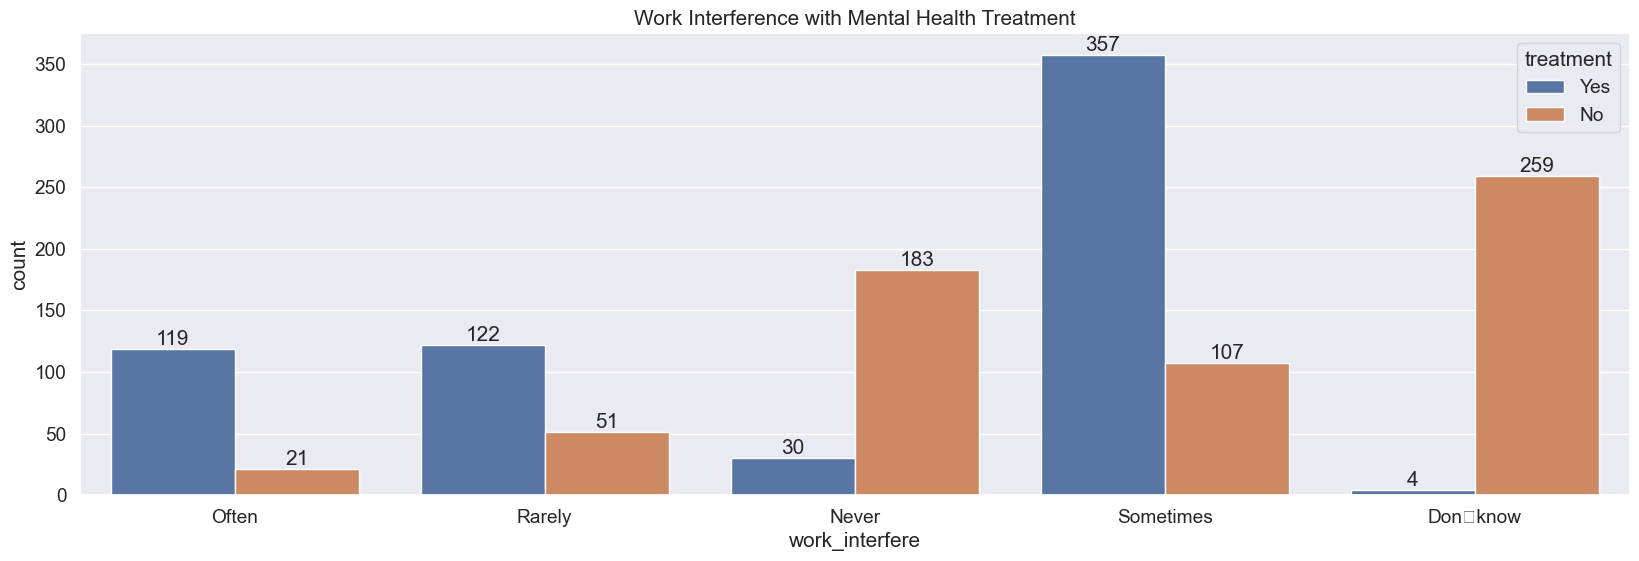

In [85]:
#  relationship between work interference and mental health treatment  
plt.figure(figsize = (20,6))
ax = sns.countplot(x ='work_interfere' ,data = df, hue ='treatment')
sns.set(font_scale=1.25)
for bars in ax.containers:
    ax.bar_label(bars)
plt.title('Work Interference with Mental Health Treatment');
    

In [86]:
# Employess which are suffering from the issue, their work is getting affected.

<Figure size 1000x600 with 0 Axes>

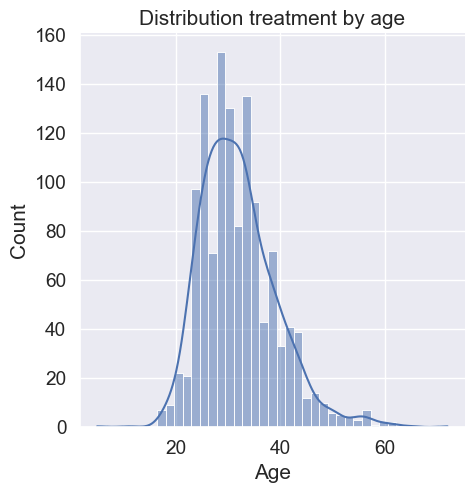

In [87]:
# mental health treatment distribution age  
plt.figure(figsize=(10, 6));
sns.displot(df['Age'],kde ='treatment');
plt.title('Distribution treatment by age');

In [88]:
# The majority of individuals grappling with mental health issues fall within the age range of 25 to 35.

Text(0.5, 1.0, 'Comparison of Mental Health Benefits and Care Options')

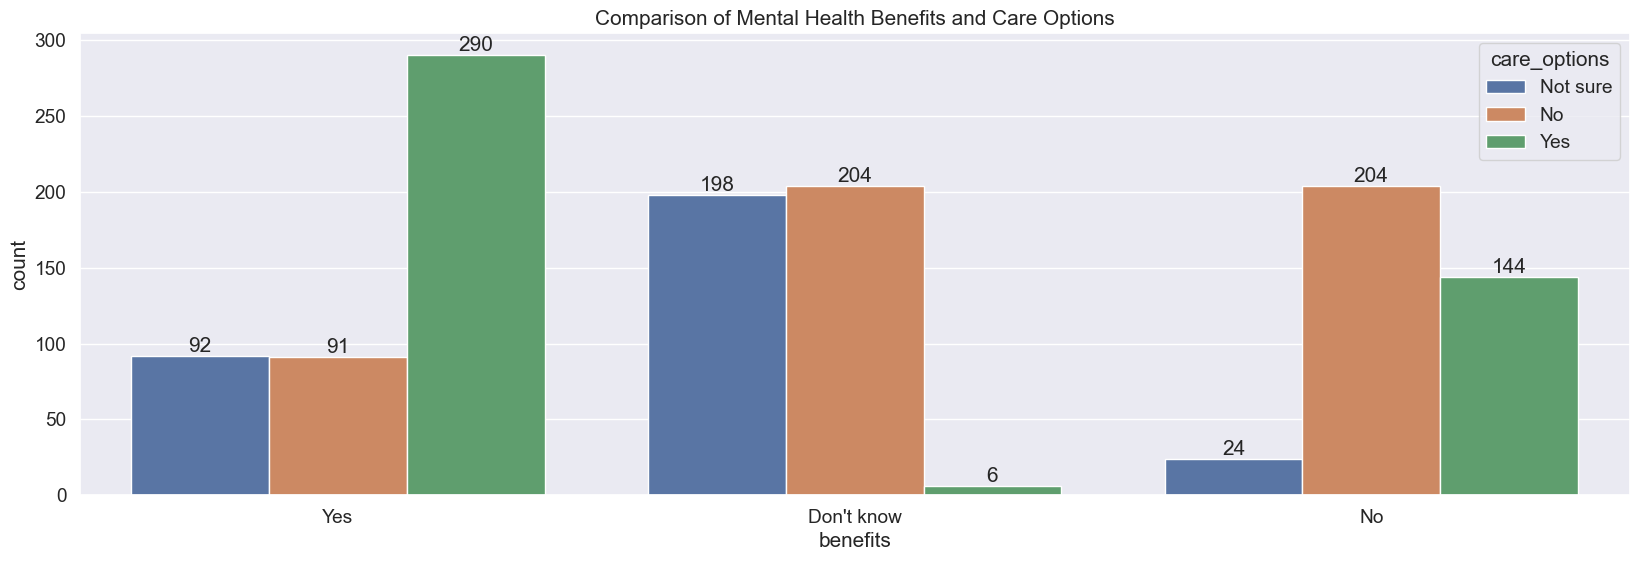

In [89]:
#In this plot We can see link between mental health benefits and care options in the workplace.
plt.figure(figsize = (20,6))
ax = sns.countplot(x ='benefits' ,data = df,hue ='care_options')
sns.set(font_scale=1.25)
for bars in ax.containers:
    ax.bar_label(bars)
plt.title('Comparison of Mental Health Benefits and Care Options')

In [90]:
# Employees of companies offering comprehensive benefits tend to avail themselves of a wider range of healthcare options.

Text(0.5, 1.0, 'Workplace Wellness vs. Help-Seeking: A Comparison')

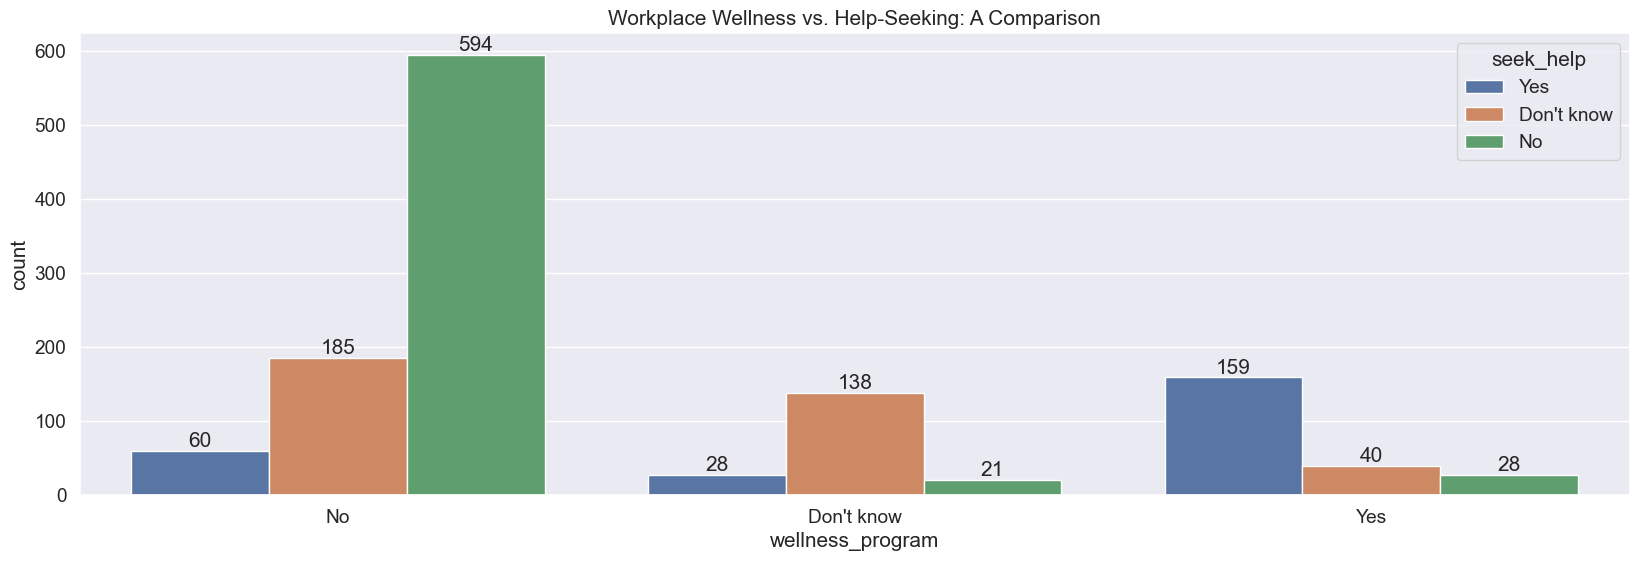

In [91]:
#In this plot We can see relation between wellness program and seek help.
plt.figure(figsize = (20,6))
ax = sns.countplot(x ='wellness_program' ,data = df,hue ='seek_help')
sns.set(font_scale=1.25)
for bars in ax.containers:
    ax.bar_label(bars)
plt.title('Workplace Wellness vs. Help-Seeking: A Comparison')

In [92]:
# Companies with effective wellness programs typically experience increased employee engagement in seeking help for mental health issues.

In [93]:
# labelencoding
le = LabelEncoder()
column_to_encode = ['Gender','Country','care_options','seek_help','wellness_program','self_employed','family_history', 'treatment','work_interfere','no_employees','remote_work', 'tech_company','benefits','anonymity','leave', 'mental_health_consequence','phys_health_consequence','coworkers','phys_health_interview','mental_vs_physical','obs_consequence','mental_vs_physical','supervisor','mental_health_interview']
for column in column_to_encode:
    df[column] = le.fit_transform(df[column])

In [94]:
df

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,0,44,0,0,1,2,4,0,1,...,2,2,1,1,1,2,1,0,2,0
1,44,1,44,0,0,0,3,5,0,0,...,0,0,0,1,0,0,1,1,0,0
2,32,1,6,0,0,0,3,4,0,1,...,0,1,1,1,2,2,2,2,1,0
3,31,1,43,0,1,1,2,2,0,1,...,1,1,2,2,1,0,0,0,1,1
4,31,1,44,0,0,0,1,1,1,1,...,0,0,1,1,1,2,2,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,26,1,43,0,0,1,0,2,0,1,...,0,2,1,1,1,1,1,1,0,0
1255,32,1,44,0,1,1,2,2,1,1,...,2,1,1,1,1,2,1,1,2,0
1256,34,1,44,0,1,1,4,5,0,1,...,0,1,2,2,0,0,1,1,1,0
1257,46,0,44,0,0,0,0,1,1,1,...,0,0,2,1,0,0,1,1,1,0


In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1253 entries, 0 to 1258
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   Age                        1253 non-null   int64
 1   Gender                     1253 non-null   int32
 2   Country                    1253 non-null   int32
 3   self_employed              1253 non-null   int32
 4   family_history             1253 non-null   int32
 5   treatment                  1253 non-null   int32
 6   work_interfere             1253 non-null   int32
 7   no_employees               1253 non-null   int32
 8   remote_work                1253 non-null   int32
 9   tech_company               1253 non-null   int32
 10  benefits                   1253 non-null   int32
 11  care_options               1253 non-null   int32
 12  wellness_program           1253 non-null   int32
 13  seek_help                  1253 non-null   int32
 14  anonymity               

In [96]:
df.describe()


,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
count,1253.000000,1253.000000,1253.000000,1253.000000,1253.000000,1253.000000,1253.000000,1253.000000,1253.000000,1253.000000,...,1253.000000,1253.000000,1253.000000,1253.000000,1253.000000,1253.000000,1253.000000,1253.000000,1253.000000,1253.000000
mean,32.038308,0.818835,36.810854,0.114126,0.390263,0.504389,2.288907,2.787709,0.296887,0.819633,...,0.646449,1.407821,0.849960,0.828412,0.972067,1.098164,0.867518,0.715882,0.814046,0.144453
std,7.346630,0.422864,13.251685,0.318091,0.488004,0.500180,1.596075,1.737468,0.457069,0.384646,...,0.908065,1.506801,0.766612,0.484676,0.619197,0.843565,0.424874,0.723219,0.834401,0.351689
min,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,1.000000,41.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,31.000000,1.000000,44.000000,0.000000,0.000000,1.000000,3.000000,3.000000,0.000000,1.000000,...,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
75%,36.000000,1.000000,44.000000,0.000000,1.000000,1.000000,4.000000,4.000000,1.000000,1.000000,...,2.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,2.000000,0.000000
max,72.000000,2.000000,45.000000,1.000000,1.000000,1.000000,4.000000,5.000000,1.000000,1.000000,...,2.000000,4.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000


In [97]:
df['Country'] = StandardScaler().fit_transform(df[['Country']])
df['work_interfere'] = StandardScaler().fit_transform(df[['work_interfere']])
df['no_employees'] = StandardScaler().fit_transform(df[['no_employees']])
df['leave'] = StandardScaler().fit_transform(df[['leave']])
df['Age'] = MaxAbsScaler().fit_transform(df[['Age']])
df.isnull().sum()


Age                          0
Gender                       0
Country                      0
self_employed                0
family_history               0
treatment                    0
work_interfere               0
no_employees                 0
remote_work                  0
tech_company                 0
benefits                     0
care_options                 0
wellness_program             0
seek_help                    0
anonymity                    0
leave                        0
mental_health_consequence    0
phys_health_consequence      0
coworkers                    0
supervisor                   0
mental_health_interview      0
phys_health_interview        0
mental_vs_physical           0
obs_consequence              0
dtype: int64

In [98]:
matrix= df.corr().round(2)
matrix

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
Age,1.00,0.05,0.15,0.07,0.01,0.08,0.04,0.04,0.14,-0.06,...,0.02,-0.01,0.03,-0.05,-0.01,0.01,0.06,-0.02,-0.02,0.07
Gender,0.05,1.00,-0.08,0.05,-0.13,-0.15,-0.09,0.02,0.01,0.05,...,-0.02,0.03,0.03,0.02,0.06,0.07,-0.04,-0.01,-0.00,-0.05
Country,0.15,-0.08,1.00,-0.12,0.07,0.08,0.03,0.10,-0.02,-0.04,...,0.01,-0.10,-0.04,-0.01,-0.03,0.00,0.06,-0.01,-0.01,-0.07
self_employed,0.07,0.05,-0.12,1.00,0.00,0.01,0.04,-0.34,0.32,0.08,...,0.10,0.17,0.02,0.01,0.07,0.04,-0.02,-0.03,0.13,0.07
family_history,0.01,-0.13,0.07,0.00,1.00,0.38,0.32,-0.05,0.01,-0.05,...,0.06,0.02,0.02,-0.00,-0.00,0.00,0.04,0.04,0.04,0.12
treatment,0.08,-0.15,0.08,0.01,0.38,1.00,0.62,-0.05,0.03,-0.03,...,0.14,0.06,0.03,-0.02,0.07,-0.03,0.09,0.05,0.06,0.15
work_interfere,0.04,-0.09,0.03,0.04,0.32,0.62,1.00,-0.06,0.04,0.01,...,0.06,0.05,0.06,-0.02,0.01,-0.10,0.10,-0.02,0.05,0.14
no_employees,0.04,0.02,0.10,-0.34,-0.05,-0.05,-0.06,1.00,-0.21,-0.11,...,-0.00,-0.09,-0.00,-0.07,-0.09,-0.05,0.02,0.03,-0.03,-0.01
remote_work,0.14,0.01,-0.02,0.32,0.01,0.03,0.04,-0.21,1.00,0.13,...,-0.00,0.10,0.05,-0.02,0.08,0.02,-0.04,-0.02,0.03,-0.04
tech_company,-0.06,0.05,-0.04,0.08,-0.05,-0.03,0.01,-0.11,0.13,1.00,...,-0.05,0.04,0.00,0.07,0.07,0.05,-0.04,-0.04,0.02,-0.07


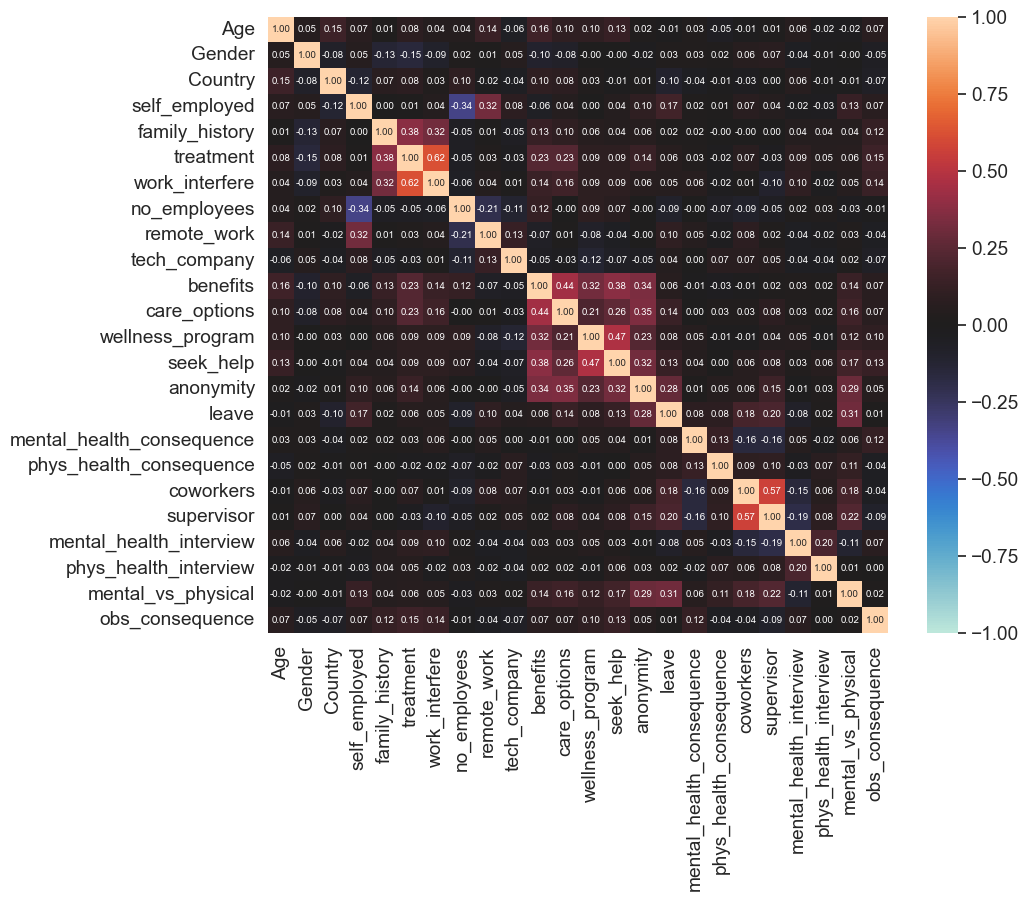

In [99]:
plt.figure(figsize=(10,8))
sns.set(font_scale=1.25)
plot = sns.heatmap(matrix,annot = True,vmin= -1 , vmax= 1 , center= 0,fmt='.2f', annot_kws={'size': 7})
plt.title('Correlation Heatmap')

In [100]:
# prediction

In [101]:
X = df.drop(columns= ['treatment'])
X.shape

(1253, 23)

In [102]:
y= df['treatment']
y.shape

(1253,)

In [103]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [104]:
# KNeighborsClassifier 
classifier = KNeighborsClassifier(n_neighbors= 5)
classifier.fit(X_train,y_train)
y_= classifier.predict(X_test.values)
print('KNN accuracy :', accuracy_score(y_true=y_test, y_pred=y_)*100)



KNN accuracy : 76.43312101910828


C:\Users\monab\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [105]:
#RandomForestClassifier
steps_rfc = [('Scaler', StandardScaler()),
             ('clf', RFC(n_estimators = 40))]
clf_rfc = Pipeline(steps=steps_rfc)
clf_rfc.fit(X_train, y_train)
y_pred_rfc = clf_rfc.predict(X_test)
print('RFC accuracy: ', accuracy_score(y_true=y_test, y_pred=y_pred_rfc)*100)

RFC accuracy:  81.21019108280255


In [106]:
# SupportVectorClassification Model
steps_svc = [('Scaler', StandardScaler()),
             ('clf', SVC())]
clf_svc = Pipeline(steps = steps_svc)
clf_svc.fit(X_train, y_train)
y_pred_svc = clf_svc.predict(X_test)
print('SVC accuracy :', accuracy_score(y_true=y_test, y_pred=y_pred_svc)*100)

SVC accuracy : 79.29936305732484


In [107]:
# DecisionTreeClassifier
classifier = DT()
classifier.fit(X_train,y_train)
accuracy = classifier.score(X_test,y_test)
Accuracy = accuracy*100
Accuracy

79.61783439490446